In [1]:
DATE = '29/01/2024'
NAME = 'NGUYỄN THÀNH PHÁT'

In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.DataFrame({
    "Year": [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979],
    "Dispine": [751.6, 779.2, 810.3, 864.7, 857.5, 874.9, 906.8, 942.9, 988.8, 1015.7],
    "Perscons": [672.1, 696.8, 737.1, 767.9, 762.8, 779.4, 823.1, 864.3, 903.2, 927.6]
})
df

,Year,Dispine,Perscons
0,1970,751.6,672.1
1,1971,779.2,696.8
2,1972,810.3,737.1
3,1973,864.7,767.9
4,1974,857.5,762.8
5,1975,874.9,779.4
6,1976,906.8,823.1
7,1977,942.9,864.3
8,1978,988.8,903.2
9,1979,1015.7,927.6


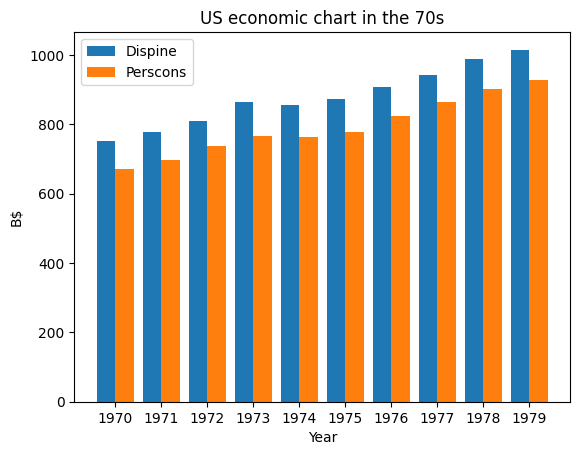

In [21]:
width_bar = 0.4
plt.bar(df['Year']-0.2, df['Dispine'], width_bar)
plt.bar(df['Year']+0.2, df['Perscons'], width_bar)
plt.xticks(df['Year'], df['Year'])
plt.legend(['Dispine', 'Perscons'])
plt.xlabel("Year") 
plt.ylabel("B$") 
plt.title('US economic chart in the 70s')
plt.show()
